Krishnasai Addala 2020442

In [3]:
!wget https://snap.stanford.edu/data/ca-GrQc.txt.gz
!gunzip ca-GrQc.txt.gz

--2023-04-25 04:52:40--  https://snap.stanford.edu/data/ca-GrQc.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109261 (107K) [application/x-gzip]
Saving to: ‘ca-GrQc.txt.gz.1’

ca-GrQc.txt.gz.1    100%[===================>] 106.70K   196KB/s    in 0.5s    

2023-04-25 04:52:41 (196 KB/s) - ‘ca-GrQc.txt.gz.1’ saved [109261/109261]



In [36]:
import networkx as nx
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

In [34]:
G = nx.read_edgelist('ca-GrQc.txt', create_using=nx.DiGraph())

print("General Relativity and Quantum Cosmology collaboration network")

General Relativity and Quantum Cosmology collaboration network


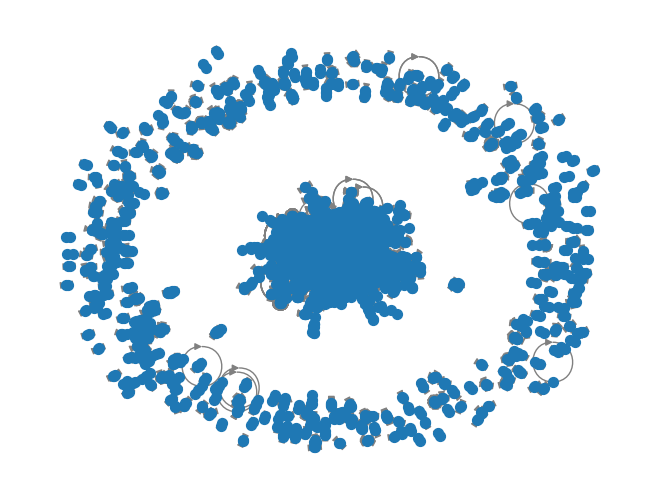

In [39]:
# Visualize the graph using Matplotlib
nx.draw(G, with_labels=False, node_size=50, edge_color='gray', pos=nx.spring_layout(G))

plt.show()

Arxiv GR-QC (General Relativity and Quantum Cosmology) collaboration network is from the e-print arXiv and covers scientific collaborations between authors papers submitted to General Relativity and Quantum Cosmology category. If an author i co-authored a paper with author j, the graph contains a undirected edge from i to j. If the paper is co-authored by k authors this generates a completely connected (sub)graph on k nodes.

The data covers papers in the period from January 1993 to April 2003 (124 months). It begins within a few months of the inception of the arXiv, and thus represents essentially the complete history of its GR-QC section.

-https://snap.stanford.edu/data/ca-GrQc.html

In [35]:
# Calculate PageRank score for each node
pr_scores = nx.pagerank(G)

# Calculate Authority and Hub score for each node
auth_scores, hub_scores = nx.hits(G)

# Print the scores for the first 10 nodes
for node in list(G.nodes())[:10]:
    print(f"Node {node} \n PageRank Score: {pr_scores[node]:}\n Authority Score: {auth_scores[node]:}\n Hub Score: {hub_scores[node]:}\n_____________________________________")


Node 3466 
 PageRank Score: 0.00028791038987549284
 Authority Score: 4.134765427976227e-06
 Hub Score: 4.134765427988061e-06
_____________________________________
Node 937 
 PageRank Score: 0.00019009872909030306
 Authority Score: 1.7295705867898783e-06
 Hub Score: 1.7295705867896358e-06
_____________________________________
Node 5233 
 PageRank Score: 8.892996087934685e-05
 Authority Score: 7.91681928615082e-07
 Hub Score: 7.916819286148086e-07
_____________________________________
Node 8579 
 PageRank Score: 0.00019347739396011744
 Authority Score: 6.080693618939695e-07
 Hub Score: 6.080693618938467e-07
_____________________________________
Node 10310 
 PageRank Score: 0.00045337346602052374
 Authority Score: 3.197912166069069e-05
 Hub Score: 3.1979121660690447e-05
_____________________________________
Node 15931 
 PageRank Score: 0.0003559651569003916
 Authority Score: 1.1239891345233473e-05
 Hub Score: 1.1239891345233068e-05
_____________________________________
Node 17038 
 PageRa

In [31]:
# Get the PageRank and authority scores as arrays
pr_scores_arr = list(pr_scores.values())
authority_scores_arr = list(auth_scores.values())

# Compute the Spearman's rank correlation coefficient
corr, p_value = spearmanr(pr_scores_arr, authority_scores_arr)

print("Spearman's rank correlation coefficient between PageRank and authority scores: ", corr)
if corr > 0:
    print("There is a positive correlation between PageRank and hub scores.")
elif corr < 0:
    print("There is a negative correlation between PageRank and hub scores.")
else:
    print("There is no correlation between PageRank and hub scores.")


Spearman's rank correlation coefficient between PageRank and authority scores:  0.05809877657296374
There is a positive correlation between PageRank and hub scores.


In [38]:
# Get the hub scores as an array
hub_scores_arr = list(hub_scores.values())

# Compute the Spearman's rank correlation coefficient
corr, p_value = spearmanr(pr_scores_arr, hub_scores_arr)

print("Spearman's rank correlation coefficient between PageRank and hub scores: ", corr)
if corr > 0:
    print("There is a positive correlation between PageRank and hub scores.")
elif corr < 0:
    print("There is a negative correlation between PageRank and hub scores.")
else:
    print("There is no correlation between PageRank and hub scores.")

Spearman's rank correlation coefficient between PageRank and hub scores:  0.05809353675717669
There is a positive correlation between PageRank and hub scores.


We can see the scores have a weak positive correlation
This shows that the two algorithms rank nodes in a similar way based on their importance in the network to some extent, but there are also differences in their ranking methodologies that lead to variations in the rankings.

# Testing

In [8]:
!wget https://snap.stanford.edu/data/web-BerkStan.txt.gz
!gunzip web-BerkStan.txt.gz

--2023-04-25 05:14:35--  https://snap.stanford.edu/data/web-BerkStan.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19657604 (19M) [application/x-gzip]
Saving to: ‘web-BerkStan.txt.gz’

web-BerkStan.txt.gz 100%[===================>]  18.75M  3.75MB/s    in 5.0s    

2023-04-25 05:14:40 (3.75 MB/s) - ‘web-BerkStan.txt.gz’ saved [19657604/19657604]



In [10]:
# Load the web graph data from file
G = nx.read_edgelist('web-BerkStan.txt', create_using=nx.DiGraph())

# Calculate the PageRank scores for each node
pagerank_scores = nx.pagerank(G)

# Print the PageRank score for each node
c=0
for node, score in pagerank_scores.items():
    print(f"Node {node}: PageRank score = {score}")
    c+=1
    if(c==11):
      break

Node 1: PageRank score = 1.830613564418469e-05
Node 2: PageRank score = 5.277322767121117e-06
Node 5: PageRank score = 4.766957674528825e-06
Node 7: PageRank score = 6.056233907510717e-06
Node 8: PageRank score = 4.471529709624802e-06
Node 9: PageRank score = 5.319262487423507e-06
Node 11: PageRank score = 5.307838927805759e-06
Node 17: PageRank score = 5.205971814401508e-06
Node 254913: PageRank score = 0.00017619621311662766
Node 438238: PageRank score = 0.008911562616865812
Node 255378: PageRank score = 1.3686104039355115e-06


In [11]:
# Calculate the Authority and Hub scores for each node
authority_scores, hub_scores = nx.hits(G)

# Print the Authority and Hub score for each node
c=0
for node in G.nodes():
    print(f"Node {node}: Authority score = {authority_scores[node]}, Hub score = {hub_scores[node]}")
    c+=1
    if(c==11):
      break


Node 1: Authority score = 9.7301708837177e-14, Hub score = 3.9695641325593297e-13
Node 2: Authority score = 9.729935728728732e-14, Hub score = 4.9284734820914475e-14
Node 5: Authority score = 9.730213926984448e-14, Hub score = 2.4641583057780242e-14
Node 7: Authority score = 9.732734826966046e-14, Hub score = 4.9374902950594086e-14
Node 8: Authority score = 9.732118599516126e-14, Hub score = 2.0533393060458612e-14
Node 9: Authority score = 9.734076690139677e-14, Hub score = 4.928298170733057e-14
Node 11: Authority score = 9.729978588465466e-14, Hub score = 4.9284729449820245e-14
Node 17: Authority score = 9.736335996302806e-14, Hub score = 4.116291720915711e-14
Node 254913: Authority score = 9.73558042275669e-14, Hub score = 5.479619100086703e-12
Node 438238: Authority score = 1.6399591121187003e-13, Hub score = 1.8633873585971095e-09
Node 255378: Authority score = 5.930464175498182e-18, Hub score = 4.108675700437733e-15
